In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

# ***Assignment 2 Question 1*** 

## 1. Defining helpful functions.

Defining fucntion for normalization.

In [2]:
def normalize(X:np.ndarray):
    return (X - X.min()) / (X.max() - X.min())

Defining function for standardization.

In [3]:
def standardize(X:np.ndarray):
    return (X - X.mean()) / X.std()

Defining sigmoid function.

In [4]:
def sigmoid(z:np.ndarray):
    return (1 + np.exp(-z))**(-1)

Defining the cost function.

In [5]:
def costFunction(y:np.ndarray, predictions:np.ndarray):
    # y and predicitons are column matrices
    return ((y - predictions)**2).sum()

Defining function to predict probabilities.

In [6]:
def predictProbablities(X:np.ndarray, b0:float, b1:float):
    return sigmoid(b0 + (X.reshape((-1,1)) @ np.array([[b1]])))

Defining function to check Accuracy.

In [7]:
def checkAccuracy(y_original, y_predicted):
    accuracy = 0
    for idx, y in enumerate(y_predicted):
        if y == y_original[idx]:
            accuracy += 1
    return (accuracy/y_original.size)*100

## 2. Defining Algorithms for scratch and sklearn.

Defining logistic regression algorithm from scratch.

In [8]:
def logisticRegressionScratch(X:np.ndarray, y:np.ndarray, learning_rates:tuple, num_iterations:np.int64, initial_b0:np.float64=0, initial_b1:np.float64=1):
    # X and y are column matrices
    m = X.size
    # X = np.hstack( (np.ones((m,1)), X) )
    # taking note of history
    epochs = np.arange(1,num_iterations+1)
    cost_history = []
    # taking the steps
    for epoch in epochs:
        # finding probabilities
        predictions = predictProbablities(X, initial_b0, initial_b1)
        cost_history.append(costFunction(y, predictions))
        # setting 0.5 as the threshhold
        # predictions = np.array([1 if p > 0.5 else 0 for p in predictions])
        # finding gradient
        D_b0 = -2 * ( (y - predictions) * predictions * (1 - predictions) ).sum()
        D_b1 = -2 * ( (y - predictions) * predictions * (1 - predictions) * X).sum()
        initial_b0 -= learning_rates[0]*D_b0
        initial_b1 -= learning_rates[1]*D_b1

    return initial_b0, initial_b1, epochs, cost_history

Defining logistic regression algorithm from sklearn.

In [9]:
def logisticRegressionSklearn(X_train:np.ndarray, y_train:np.ndarray, X_test:np.ndarray):
    # create an instance and fit the model
    lr_model = LogisticRegression()
    lr_model.fit(X = X_train, y = y_train.reshape(-1))

    # make predictions
    predictions = lr_model.predict(X_test)
    
    return predictions

## 3. Loading data and making it ready.

Loading the Data

In [10]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Splitting the data into 70:30

In [11]:
X_train, X_test, y_train, y_test = tuple(map(np.array, train_test_split(df['Age'], df['Purchased'], random_state=1, test_size=0.30)))
X_train = np.array(X_train).reshape((-1, 1))
y_train = np.array(y_train).reshape((-1, 1))
X_test = np.array(X_test).reshape((-1, 1))
y_test = np.array(y_test).reshape((-1, 1))

Normalizing and Standardizing it.

In [12]:
X_train_norm = normalize(X_train)
y_train_norm = normalize(y_train)
X_test_norm = normalize(X_test)
y_test_norm = normalize(y_test)

X_train_stand = standardize(X_train)
y_train_stand = standardize(y_train)
X_test_stand = standardize(X_test)
y_test_stand = standardize(y_test)

## Implementing logistic regression for <ins>raw data</ins> by <ins>scratch<ins>.

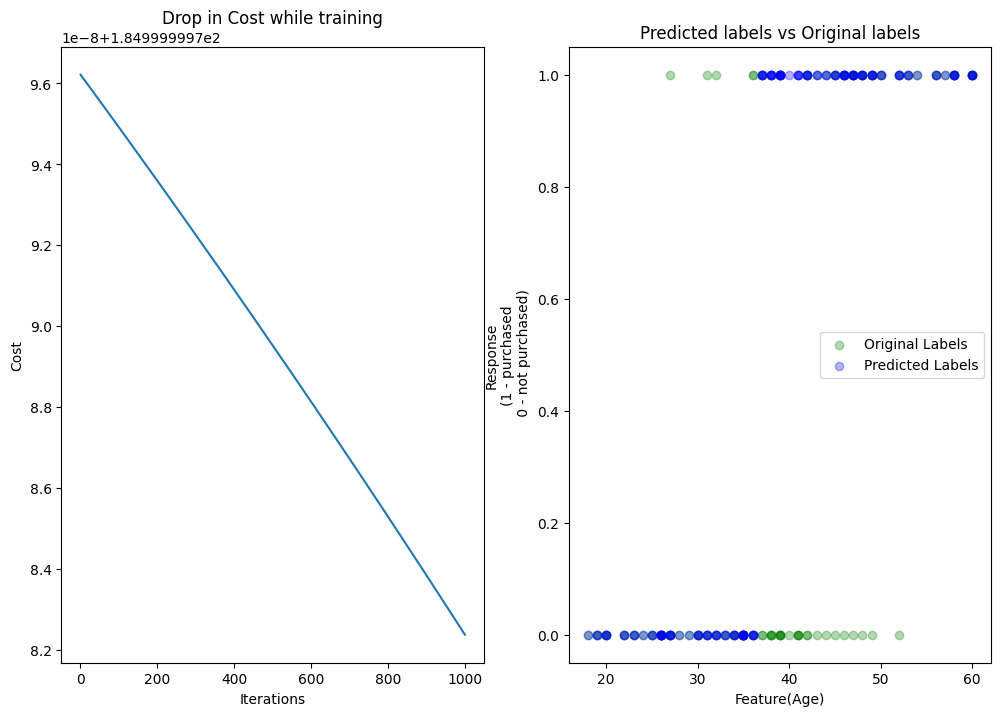

In [13]:
b0_raw_scratch, b1_raw_scratch, epochs1, cost_history1 = logisticRegressionScratch(X=X_train, y=y_train, learning_rates=(0.9, 0.9), num_iterations=1000)

plt.figure(figsize=(12,8))
# plotting cost vs epochs
plt.subplot(1,2,1)
plt.plot(epochs1 , cost_history1)
plt.title('Drop in Cost while training')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# plotting the test data along with the predicted values
predicted_raw_scratch = predictProbablities(X_test, b0_raw_scratch, b1_raw_scratch)
predicted_raw_scratch = np.array([ 1 if p>0.999999999999999944485 else 0 for p in predicted_raw_scratch])
plt.subplot(1,2,2)
plt.scatter(X_test , y_test, c='green', alpha=0.3)
plt.scatter(X_test, predicted_raw_scratch, c='blue', alpha=0.3)
plt.legend(('Original Labels', 'Predicted Labels'))
plt.title('Predicted labels vs Original labels')
plt.xlabel('Feature(Age)')
plt.ylabel('Response\n(1 - purchased\n 0 - not purchased)')
plt.show()

## Implementing logistic regression for <ins>normalized data</ins> by <ins>scratch</ins>.

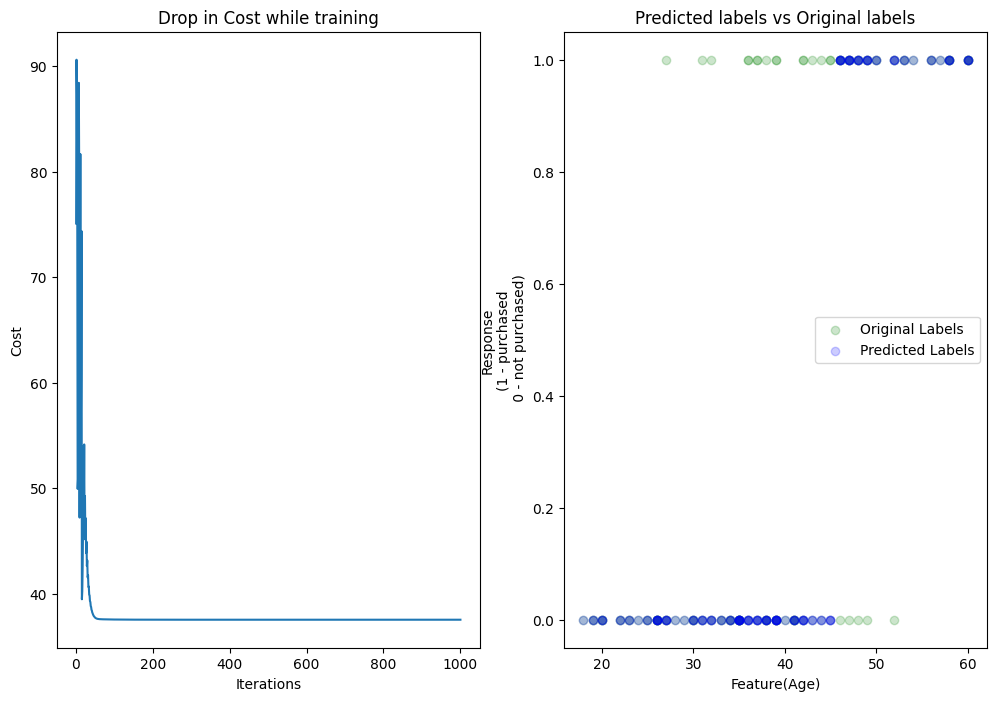

In [14]:
b0_norm_scratch, b1_norm_scratch, epochs2, cost_history2 = logisticRegressionScratch(X=X_train_norm, y=y_train_norm, learning_rates=(0.1, 0.1), num_iterations=1000)

plt.figure(figsize=(12,8))
# plotting cost vs epochs
plt.subplot(1,2,1)
plt.plot(epochs2 , cost_history2)
plt.title('Drop in Cost while training')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# plotting the test data along with the predicted values
predicted_norm_scratch = predictProbablities(X_test_norm, b0_norm_scratch, b1_norm_scratch)
predicted_norm_scratch = np.array([ 1 if p > sigmoid(0.5) else 0 for p in predicted_norm_scratch])
plt.subplot(1,2,2)
plt.scatter(X_test , y_test, c='green', alpha=0.2)
plt.scatter(X_test, predicted_norm_scratch, c='blue', alpha=0.2)
plt.legend(('Original Labels', 'Predicted Labels'))
plt.title('Predicted labels vs Original labels')
plt.xlabel('Feature(Age)')
plt.ylabel('Response\n(1 - purchased\n 0 - not purchased)')
plt.show()

## Implementing logistic regression for <ins>standardized data</ins> by <ins>scratch</ins>.

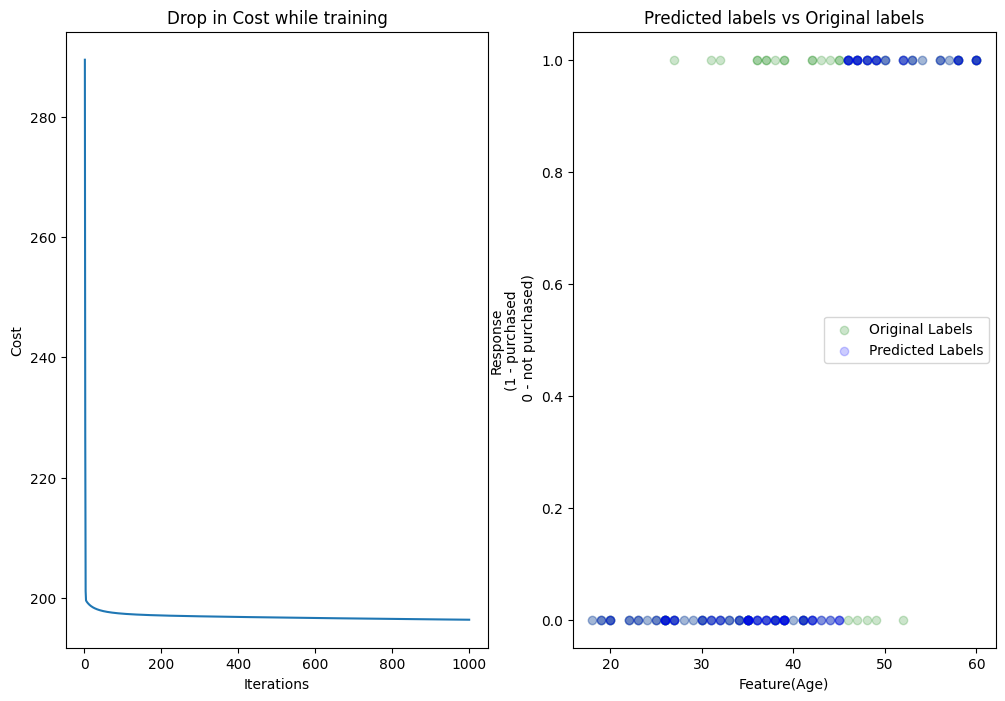

In [15]:
b0_stand_scratch, b1_stand_scratch, epochs3, cost_history3 = logisticRegressionScratch(X=X_train_stand, y=y_train_stand, learning_rates=(0.1, 0.1), num_iterations=1000)

plt.figure(figsize=(12,8))
# plotting cost vs epochs
plt.subplot(1,2,1)
plt.plot(epochs3 , cost_history3)
plt.title('Drop in Cost while training')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# plotting the test data along with the predicted values
predicted_stand_scratch = predictProbablities(X_test_stand, b0_stand_scratch, b1_stand_scratch)
predicted_stand_scratch = np.array([ 1 if p > 0.5 else 0 for p in predicted_stand_scratch])
plt.subplot(1,2,2)
plt.scatter(X_test , y_test, c='green', alpha=0.2)
plt.scatter(X_test, predicted_stand_scratch, c='blue', alpha=0.2)
plt.legend(('Original Labels', 'Predicted Labels'))
plt.title('Predicted labels vs Original labels')
plt.xlabel('Feature(Age)')
plt.ylabel('Response\n(1 - purchased\n 0 - not purchased)')
plt.show()

## Implementing logistic regression for <ins>raw data</ins> by <ins>sklearn</ins>.

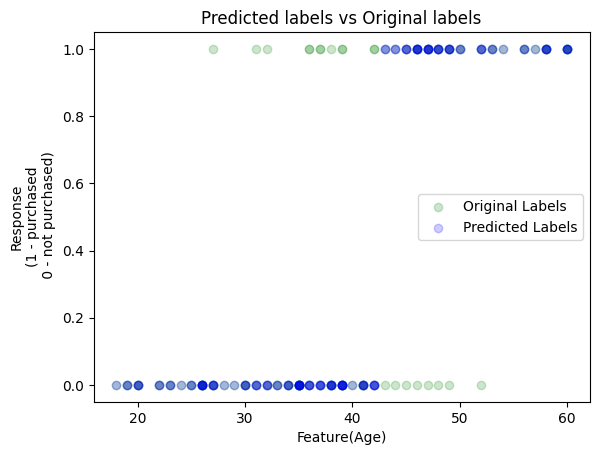

In [16]:
predicted_raw_sklearn = logisticRegressionSklearn(X_train=X_train, y_train=y_train, X_test=X_test)

plt.scatter(X_test , y_test, c='green', alpha=0.2)
plt.scatter(X_test, predicted_raw_sklearn, c='blue', alpha=0.2)
plt.legend(('Original Labels', 'Predicted Labels'))
plt.title('Predicted labels vs Original labels')
plt.xlabel('Feature(Age)')
plt.ylabel('Response\n(1 - purchased\n 0 - not purchased)')
plt.show()

## Checking accuracies

In [17]:
accuracy_raw_scratch = checkAccuracy(y_test, predicted_raw_scratch)
accuracy_norm_scratch = checkAccuracy(y_test, predicted_norm_scratch)
accuracy_stand_scratch = checkAccuracy(y_test, predicted_stand_scratch)
accuracy_raw_sklearn = checkAccuracy(y_test, predicted_raw_sklearn)

print(f"""
Accuracy of Scratch Model on Raw data: {accuracy_raw_scratch}
Accuracy of Scratch Model on Normalized data: {accuracy_norm_scratch}
Accuracy of Scratch Model on Standardized data: {accuracy_stand_scratch}

Accuracy of Sklearn Model on Raw Data: {accuracy_raw_sklearn}
""")


Accuracy of Scratch Model on Raw data: 74.16666666666667
Accuracy of Scratch Model on Normalized data: 82.5
Accuracy of Scratch Model on Standardized data: 82.5

Accuracy of Sklearn Model on Raw Data: 83.33333333333334



## ***SUMMARY***
1. Key points of using <ins>Scratch Model</ins>:
    - Using *raw data* with Scratch model gives *<ins>very very low cost decline</ins>*.
    - Also we need to set up *<ins>very very precise threshold</ins>* because the sigmoid function returns values very very close to 1 as a result of not normalising the dataset.
    - Using *normalised* and *standardised* data with Scratch results in almost similar accuracy as given by the *Sklearn* model.
2. Key points of using <ins>Sklearn Model</ins>:
    - You do not have to normalise or standardise data in Sklearn's inbuilt model.
3. Note \:- The Loss function is <ins>L2 Loss function here</ins> and not the usual binary cross entropy loss function.

# ***Assignment 2 Question 2***

## 1. Loading Data

Loading Data

In [18]:
df = pd.read_csv("Iris.csv")
# df.drop('Id', axis=1, inplace=True)
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Plotting the data


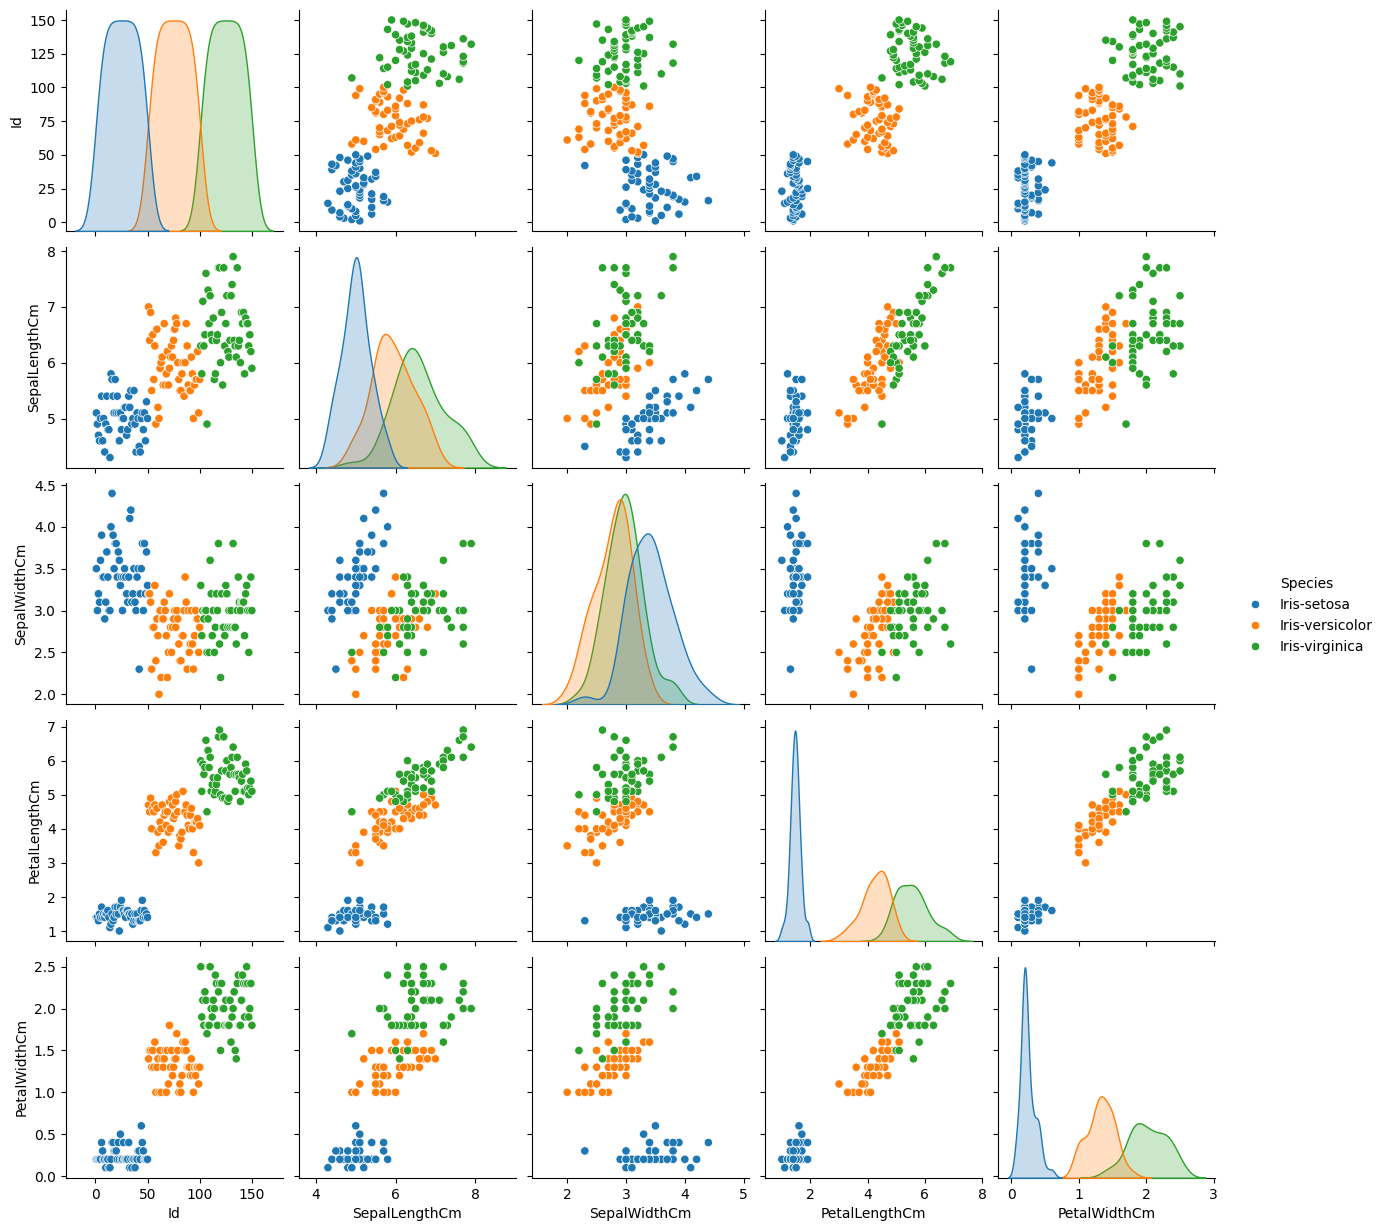

In [19]:
%matplotlib inline
sns.pairplot(df, hue="Species")

Splitting into training and testing set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Species", axis = 1), df["Species"], test_size=0.3, random_state=1)
X_train, X_test = map(np.array, (X_train, X_test))
X_train, X_test, y_train, y_test

(array([[1.19e+02, 7.70e+00, 2.60e+00, 6.90e+00, 2.30e+00],
        [1.90e+01, 5.70e+00, 3.80e+00, 1.70e+00, 3.00e-01],
        [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
        [4.60e+01, 4.80e+00, 3.00e+00, 1.40e+00, 3.00e-01],
        [6.00e+01, 5.20e+00, 2.70e+00, 3.90e+00, 1.40e+00],
        [4.00e+01, 5.10e+00, 3.40e+00, 1.50e+00, 2.00e-01],
        [3.70e+01, 5.50e+00, 3.50e+00, 1.30e+00, 2.00e-01],
        [1.18e+02, 7.70e+00, 3.80e+00, 6.70e+00, 2.20e+00],
        [1.40e+02, 6.90e+00, 3.10e+00, 5.40e+00, 2.10e+00],
        [1.08e+02, 7.30e+00, 2.90e+00, 6.30e+00, 1.80e+00],
        [1.33e+02, 6.40e+00, 2.80e+00, 5.60e+00, 2.20e+00],
        [1.27e+02, 6.20e+00, 2.80e+00, 4.80e+00, 1.80e+00],
        [8.60e+01, 6.00e+00, 3.40e+00, 4.50e+00, 1.60e+00],
        [1.23e+02, 7.70e+00, 2.80e+00, 6.70e+00, 2.00e+00],
        [9.60e+01, 5.70e+00, 3.00e+00, 4.20e+00, 1.20e+00],
        [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
        [1.14e+02, 5.70e+00, 2.50e+00, 5

## 2. Defining Helpful functions

Defining function to find euclidean distance between two points

In [21]:
def euclideanDistance(array_1, array_2):
    # array_1 and array_2 are vectors
    array_1 = np.array(array_1)
    array_2 = np.array(array_2)
    array_1 = array_1.reshape((1,-1))
    array_2 = array_2.reshape((1,-1))
    return np.linalg.norm(array_1 - array_2)

## 3. Defining k-NN from scratch

Defining k-NN that learns from any number of attributes and applies to an array of test vectors.

In [22]:
def kNN(training_X, training_y, testing_X, k):

    result = []
    # iterating over each test vector _
    for _ in range(testing_X.shape[0]):
        # making list of tuples of index of training data points __ and corresponding distance with _
        point_distance_pairs = []
        # iteratinng over each training vector __ for the given test vector _ and finding distance between them
        for __ in range(training_X.shape[0]):
            dist = euclideanDistance(training_X[__, 1:], testing_X[_, 1:]) # starting from 1 to ignore id to calculate distance
            point_distance_pairs.append(( __ , dist))
            point_distance_pairs.sort(key = lambda x: x[1])

        # making list of indices of nearest k test data points
        neighbors = []
        for i in range(k):
            neighbors.append(point_distance_pairs[i][0])
        
        # taking votes from nearest neighbors
        class_votes = [training_y.iloc[__] for __ in neighbors]
        predicted_class = max(set(class_votes), key = class_votes.count)

        result.append(predicted_class)

    return result

## 4. Implementing the k-NN model

In [23]:
predictions_scratch = kNN(X_train, y_train, X_test, k = 5)

accuracy_scratch = accuracy_score(y_test, predictions_scratch)
print(f"Accuracy for k=5 via scratch : {accuracy_scratch*100:.2f}%")

Accuracy for k=5 via scratch : 97.78%


## 5. Implementing k-NN via sklearn

In [24]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train[:,1:], y_train) # removing the id
predictions_sklearn = knn.predict(X_test[:,1:])

accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
print(f"Accuracy for k=5 via Sklearn : {accuracy_sklearn*100:.2f}%")

Accuracy for k=5 via Sklearn : 97.78%


## 6. Plotting prediction vs actual class for both algorithms

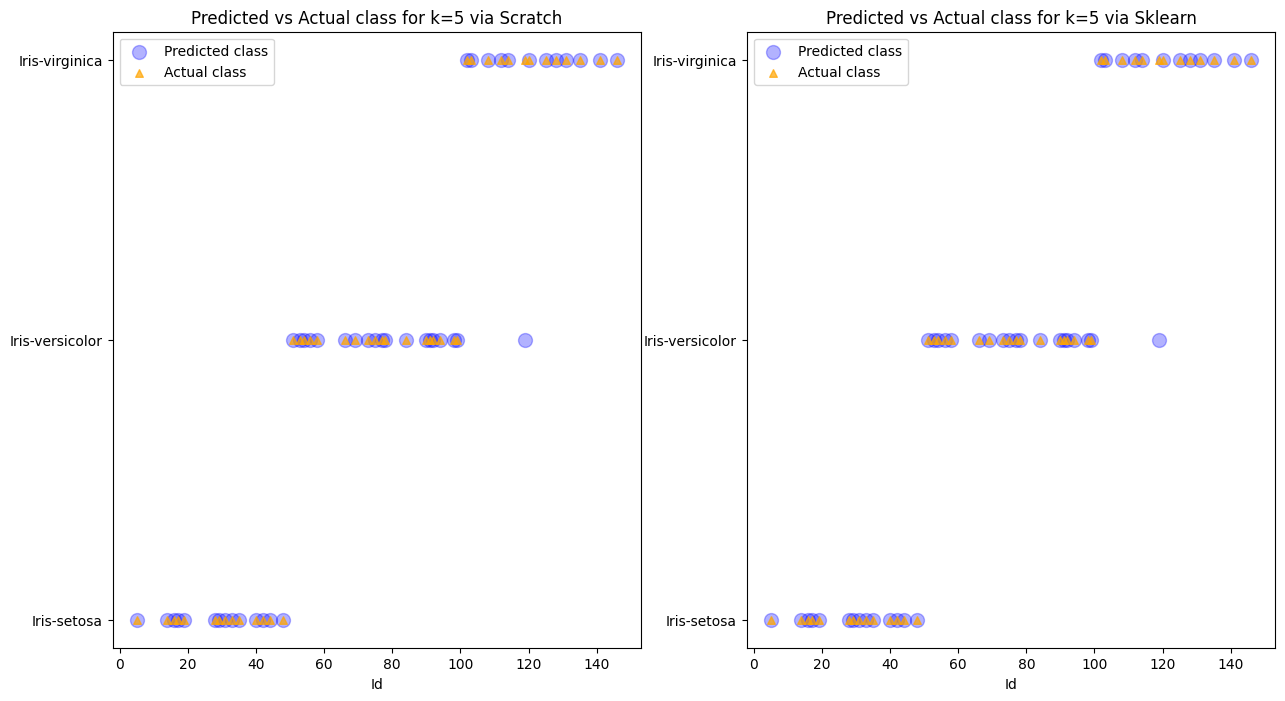

In [25]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0]-1, predictions_scratch, alpha=0.3, c='blue', s = 100)
plt.scatter(X_test[:,0]-1, y_test, c='orange', marker="^", alpha=0.7, s = 30)
plt.legend(("Predicted class", "Actual class"))
plt.xlabel("Id")
plt.title("Predicted vs Actual class for k=5 via Scratch")

plt.subplot(1,2,2)
plt.scatter(X_test[:,0]-1, predictions_sklearn, alpha=0.3, c='blue', s = 100)
plt.scatter(X_test[:,0]-1, y_test, c='orange', marker="^", alpha=0.7, s = 30)
plt.legend(("Predicted class", "Actual class"))
plt.xlabel("Id")
plt.title("Predicted vs Actual class for k=5 via Sklearn")
plt.show()

## 7. PLotting accuracy vs k

In [26]:
k_values = np.arange(1,106)
accuracies_scratch = np.empty_like(k_values)
accuracies_sklearn = np.empty_like(k_values)

for i in np.arange(1,106):
    predictions_scratch = kNN(X_train, y_train, X_test, k = i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train[:,1:], y_train)
    predictions_sklearn = knn.predict(X_test[:,1:])
    accuracies_scratch[i-1] = accuracy_score(y_test, predictions_scratch)*100
    accuracies_sklearn[i-1] = accuracy_score(y_test, predictions_sklearn)*100

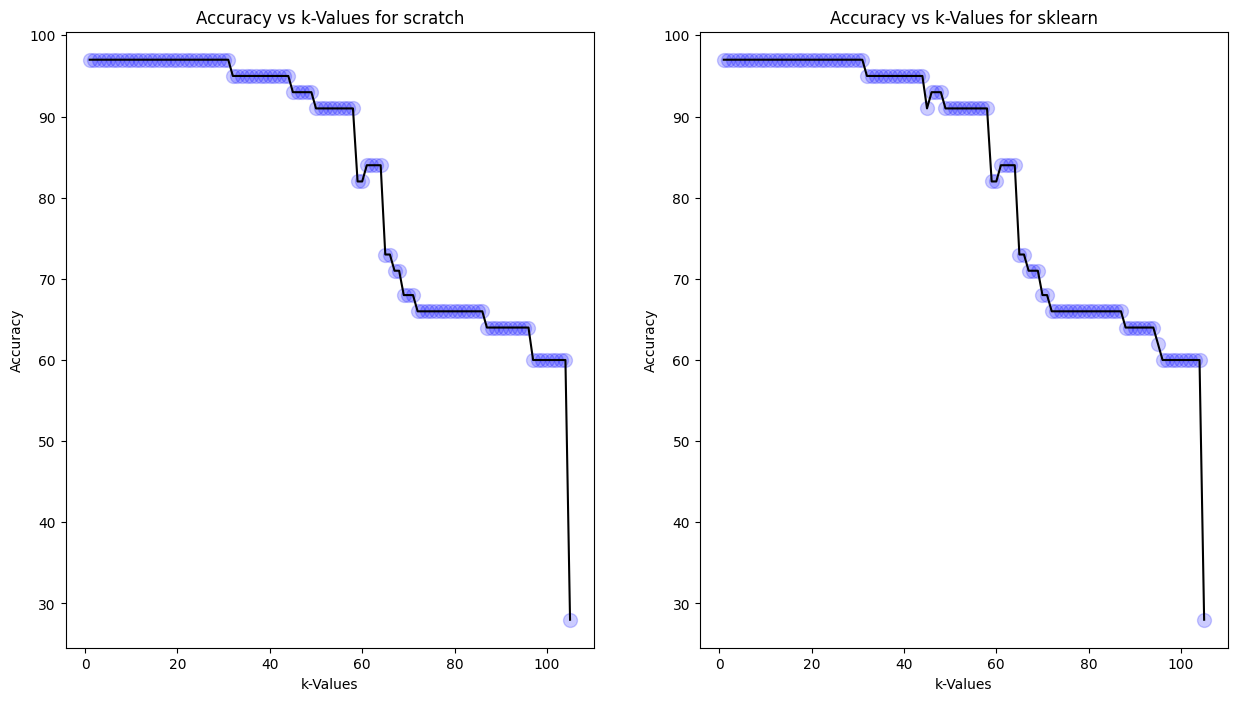

In [27]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(k_values, accuracies_scratch, color='k' )
plt.scatter(k_values, accuracies_scratch, c='blue', s=100, alpha=0.2)
plt.xlabel("k-Values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k-Values for scratch")

plt.subplot(1,2,2)
plt.plot(k_values, accuracies_sklearn, color='k' )
plt.scatter(k_values, accuracies_sklearn, c='blue', s=100, alpha=0.2)
plt.xlabel("k-Values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k-Values for sklearn")
plt.show()